## Setup

In [3]:
import torch
import matplotlib.pyplot as plt
import EIANN.utils as ut
import EIANN.plot as pt

from tqdm.autonotebook import tqdm
import numpy as np
import matplotlib.gridspec as gs
%load_ext autoreload
%autoreload 2

pt.update_plot_defaults()

train_dataloader, train_sub_dataloader, val_dataloader, test_dataloader, data_generator = ut.get_MNIST_dataloaders(sub_dataloader_size=20_000)

/Users/ag1880/github-repos/Milstein-Lab/EIANN/EIANN/utils/data_utils.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
# bpLike_learnedTD
config_path = "../network_config/mnist/20240830_EIANN_2_hidden_mnist_BP_like_config_2L_learn_TD_HWN_3_complete_optimized.yaml"
saved_network_path = "../data/mnist/20240830_EIANN_2_hidden_mnist_BP_like_config_2L_learn_TD_HWN_3_66049_257_complete.pkl"
network = ut.load_network(saved_network_path)

Loading network from '../data/mnist/20240830_EIANN_2_hidden_mnist_BP_like_config_2L_learn_TD_HWN_3_66049_257_complete.pkl'
Network successfully loaded from '../data/mnist/20240830_EIANN_2_hidden_mnist_BP_like_config_2L_learn_TD_HWN_3_66049_257_complete.pkl'


In [241]:
config_path = "../network_config/mnist/20240830_EIANN_2_hidden_mnist_BP_like_config_2L_learn_TD_HWN_3_complete_optimized.yaml"
network = ut.build_EIANN_from_config(config_path, network_seed=66049)
network.train(train_sub_dataloader, 
                epochs=1,
                samples_per_epoch=19001,
                store_history=True, 
                store_dynamics=True,
                store_params=False,
                status_bar=True)

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Samples:   0%|          | 0/19001 [00:00<?, ?it/s]

In [ ]:
ut.compute_dendritic_state_dynamics(network)

torch.Size([19001, 15, 10])

In [273]:
pop.activity_history.shape

torch.Size([19001, 15, 500])

ValueError: x and y must have same first dimension, but have shapes (15,) and torch.Size([10, 500])

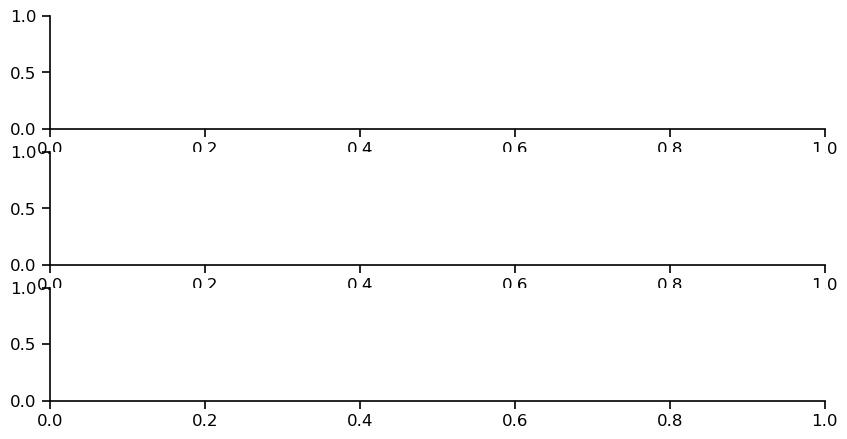

In [274]:
t = 900
pop = network.H2.E
units = torch.arange(0, 10)
fig, axes = plt.subplots(3, 1, figsize=(10, 5))

ax = axes[0]
forward_activity = pop.activity_history[t, units]
backward_activity = pop.backward_activity_history[t, units]
x1 = np.arange(0, 15)
ax.plot(x1, forward_activity)
x2 = np.arange(15, 30)
ax.plot(x2, backward_activity)
ax.vlines(14, 0, 2, color='r', linestyle='--',alpha=0.2)
ax.hlines(1, 0, 30, color='r', linestyle='--',alpha=0.2)
# plt.ylim(-0.4,10)
ax.set_xlabel('Time step')
ax.set_ylabel('Activity')
ax.set_title('Output E')

# forward_activity = network.Output.SomaI.activity_history[t, units]
# backward_activity = network.Output.SomaI.backward_activity_history[t, units]
# x1 = np.arange(0, 15)
# plt.plot(x1, forward_activity)
# x2 = np.arange(15, 30)
# plt.plot(x2, backward_activity)
# plt.vlines(14, 0, 2, color='r', linestyle='--',alpha=0.2)
# plt.hlines(1, 0, 30, color='r', linestyle='--',alpha=0.2)
# # plt.ylim(-0.4,10)
# plt.title('Output SomaI')

plt.tight_layout()
plt.show()

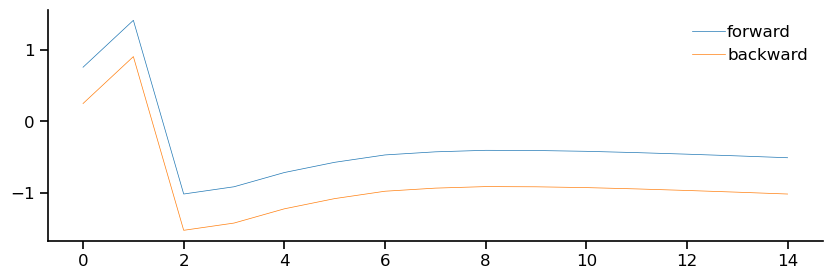

In [267]:
t = 6000
# network.Output.E.dendritic_state_history[t]
mean_forward =  torch.mean(network.H2.E.forward_dendritic_state_history_dynamics[t], axis=1)
mean_backward = torch.mean(network.H2.E.backward_dendritic_state_history_dynamics[t], axis=1)
plt.plot(mean_forward, linewidth=0.5, label='forward')
plt.plot(mean_backward, linewidth=0.5, label='backward')
# plt.plot(network.H2.E.forward_dendritic_state_history_dynamics[t], linewidth=0.5)
# plt.plot(network.H2.E.backward_dendritic_state_history_dynamics[t], linewidth=0.5)
plt.legend()
plt.show()

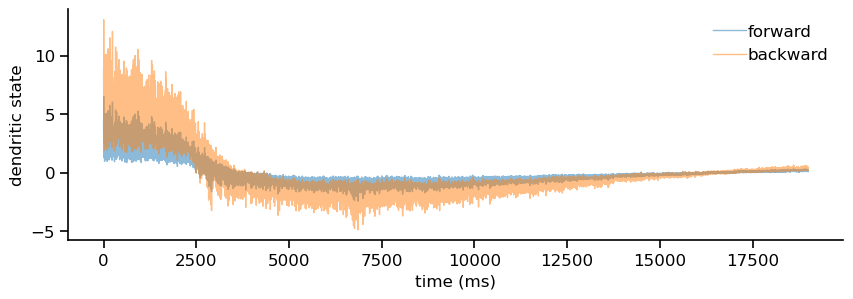

In [266]:
mean_forward =  torch.mean(network.H2.E.forward_dendritic_state_history_dynamics, axis=2)[:,-1]
mean_backward = torch.mean(network.H2.E.backward_dendritic_state_history_dynamics, axis=2)[:,-1]

plt.plot(mean_forward, linewidth=1, label='forward', alpha=0.5)
plt.plot(mean_backward, linewidth=1, label='backward', alpha=0.5)
plt.legend()
plt.xlabel('time (ms)')
plt.ylabel('dendritic state')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (15,) and torch.Size([10])

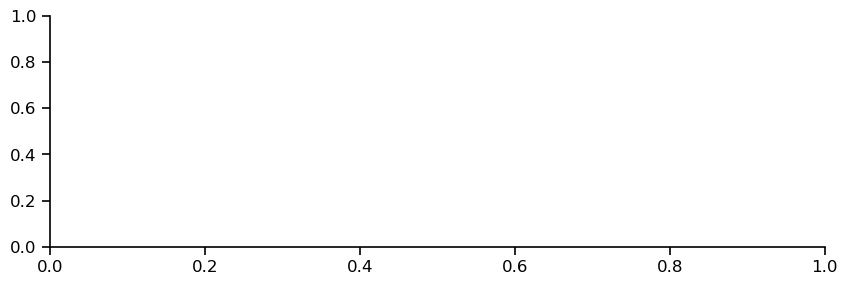

In [132]:
network.Output.E.plateau_history[:,0]
backward_dend = network.Output.E.plateau_history[t]
x2 = np.arange(15, 30)
plt.plot(x2, backward_dend)
plt.vlines(14, 0, 2, color='r', linestyle='--',alpha=0.2)
plt.hlines(1, 0, 30, color='r', linestyle='--',alpha=0.2)
plt.ylim(-0.4,10)
plt.show()

In [142]:
network.H1.E.dendritic_state_history.shape

AttributeError: 'Population' object has no attribute 'dendritic_state_history'

In [145]:
network.H1.E.backward_dendritic_state_history.shape

torch.Size([1000, 500])

## Simple BP Dale

In [ ]:
# Build network
config_path = "../network_config/MNIST_templates/EIANN_1_hidden_mnist_bpDale.yaml"
network = ut.build_EIANN_from_config(config_path, network_seed=66049)
# data_generator.manual_seed(257)
# network.train(train_sub_dataloader, 
#                 test_dataloader, 
#                 epochs=1,
#                 val_interval=(0,-1,1000),
#                 store_history=False, 
#                 store_params=False,
#                 status_bar=True)

saved_network_path = "saved_networks/EIANN_1_hidden_mnist_bpDale_66049_257.pkl"
# ut.save_network(network, saved_network_path)

network = ut.load_network(saved_network_path)

In [ ]:
pt.plot_batch_accuracy(network, test_dataloader, population='OutputE')

In [ ]:
hidden_weights = network.module_dict['H1E_InputE'].weight.data
pt.plot_hidden_weights(hidden_weights, sort=True)

In [ ]:
population = network.H1.E
percent_correct, average_pop_activity_dict = ut.compute_test_activity(network, test_dataloader, sort=False)
# receptive_fields = ut.compute_maxact_receptive_fields(population)
# pt.plot_receptive_fields(receptive_fields, sort=True, scale=1, average_pop_activity=average_pop_activity_dict['H1E'])
pt.plot_receptive_fields(hidden_weights, sort=True, scale=1, average_pop_activity=average_pop_activity_dict['H1E'])

In [ ]:
pt.plot_receptive_fields(hidden_weights, sort=True, scale=1)

In [ ]:
# population = network.Output.E
# receptive_fields = ut.compute_maxact_receptive_fields(population)
# percent_correct, average_pop_activity_dict = ut.compute_test_activity(network, test_dataloader, sort=False)
pt.plot_receptive_fields(receptive_fields, sort=False, scale=1, num_rows=4, num_cols=3)


## van Backprop G

In [ ]:
# Build network
config_path = "../network_config/mnist/20231120_EIANN_1_hidden_mnist_van_bp_relu_SGD_config_G_optimized.yaml"
saved_network_path = "../data/mnist/20231120_EIANN_1_hidden_mnist_van_bp_relu_SGD_config_G_66049_257.pkl"
bp_network = ut.build_EIANN_from_config(config_path, network_seed=66049)

# data_generator.manual_seed(257)
# bp_network.train(train_sub_dataloader, 
#                 test_dataloader, 
#                 epochs=1,
#                 val_interval=(0,-1,100),
#                 store_history=True, 
#                 store_params=True,
#                 status_bar=True)
saved_network_path = "saved_networks/20231025_EIANN_1_hidden_mnist_van_bp_softplus_SGD_config_66049_257_retrained.pkl"
# ut.save_network(bp_network, saved_network_path)

bp_network = ut.load_network(saved_network_path)

In [ ]:
pt.plot_batch_accuracy(bp_network, test_dataloader)

In [ ]:
pt.plot_hidden_weights(bp_network.module_dict['H1E_InputE'].weight, sort=True)

In [ ]:
population = bp_network.H1.E
receptive_fields = ut.compute_maxact_receptive_fields(population, export=False, overwrite=True)
pt.plot_receptive_fields(receptive_fields, sort=True, scale=1)

# percent_correct, average_pop_activity_dict = ut.compute_test_activity(bp_network, test_dataloader, sort=False)
# preferred_classes = torch.argmax(average_pop_activity_dict['H1E'],dim=1)
# pt.plot_receptive_fields(receptive_fields, scale=None, sort=True, preferred_classes=preferred_classes)

In [ ]:
# population = bp_network.H1.E
# receptive_fields = ut.compute_maxact_receptive_fields(population)
# percent_correct, average_pop_activity_dict = ut.compute_test_activity(bp_network, test_dataloader)
pt.plot_receptive_fields(receptive_fields, sort=True, scale=1, average_pop_activity=average_pop_activity_dict['H1E'])

In [ ]:
# Plot receptive fields for output units
population = bp_network.Output.E
receptive_fields = ut.compute_maxact_receptive_fields(population, export=False, overwrite=False)
pt.plot_receptive_fields(receptive_fields, scale=1)

In [ ]:
# Plot receptive fields for output units
population = bp_network.Output.E
receptive_fields = ut.compute_maxact_receptive_fields(population, export=False, overwrite=False)
pt.plot_receptive_fields(receptive_fields, scale=1)

In [ ]:
# van_bpClone = ut.compute_alternate_dParam_history(train_dataloader, bp_network, constrain_params=False, save_path="saved_networks/20231120_EIANN_1_hidden_mnist_van_bp_relu_SGD_config_G_66049_257_bpClone.pkl")

# # van_bpClone = build_EIANN_from_config(config_path, network_seed=66049)
# # van_bpClone.load(""saved_networks/20231120_EIANN_1_hidden_mnist_van_bp_relu_SGD_config_G_66049_257_bpClone.pkl"")

In [ ]:
# # Single-step stochastic backprop vs fullbatch backprop
# angles = ut.compute_dW_angles(van_bpClone.predicted_dParam_history, van_bpClone.actual_dParam_history, plot=True)

In [ ]:
# # Stepaveraged backprop vs fullbatch backprop
# angles = ut.compute_dW_angles(van_bpClone.predicted_dParam_history, van_bpClone.actual_dParam_history_stepaveraged, plot=True)

In [ ]:
# Recompute dParam history with small batch size
stored_history_step_size = torch.diff(bp_network.param_history_steps)[-1]
van_bpClone2 = ut.compute_alternate_dParam_history(train_dataloader, bp_network, batch_size=stored_history_step_size, constrain_params=False, 
                                                   save_path = "saved_networks/20231120_EIANN_1_hidden_mnist_van_bp_relu_SGD_config_G_66049_257_bpClone_batch100.pkl")

# Stepaveraged stochastic backprop vs backprop with batch_size=100
angles = ut.compute_dW_angles(van_bpClone2.predicted_dParam_history, van_bpClone2.actual_dParam_history_stepaveraged, plot=True)

In [ ]:
name = "20231129_EIANN_2_hidden_mnist_van_bp_relu_SGD_config_G_66051_259_complete.pkl"
network = ut.load_network(f"../data/mnist/{name}")

name2 = "20231129_EIANN_2_hidden_mnist_bpDale_relu_SGD_config_G_66049_257_complete.pkl"
network2 = ut.load_network(f"../data/mnist/{name2}")

In [ ]:
# Recompute dParam history with small batch size
stored_history_step_size = torch.diff(network.param_history_steps)[-1]
bpClone = ut.compute_alternate_dParam_history(train_dataloader, network, batch_size=stored_history_step_size, constrain_params=False, 
                                                   save_path = "saved_networks/test.pkl")

# Stepaveraged stochastic backprop vs backprop with batch_size=100
angles = ut.compute_dW_angles(bpClone.predicted_dParam_history, bpClone.actual_dParam_history_stepaveraged, plot=True, only_updated_params=True)

In [ ]:
"Dend" in "".join((network.populations.keys()))

## 2 hidden van Backprop G

In [ ]:
# Build network
config_path = "../optimize/data/mnist/20231129_EIANN_2_hidden_mnist_van_bp_relu_SGD_config_G_complete_optimized.yaml"
saved_network_path = "../data/mnist/20231129_EIANN_2_hidden_mnist_van_bp_relu_SGD_config_G_66049_257_complete.pkl"
# bp_network = build_EIANN_from_config(config_path, network_seed=66049)

bp_network = ut.load_network(saved_network_path)
pt.plot_batch_accuracy(bp_network, test_dataloader)
# pt.plot_batch_accuracy(bp_network, test_dataloader, population=bp_network.H1.E, export=True, overwrite=False)


In [ ]:
pt.plot_loss_landscape(test_dataloader, network1=bp_network, network2=None, num_points=10, extension=1, vmax=2, plot_line_loss=False)

In [ ]:
import torch.nn.functional as F

a = torch.tensor([0.1, 0.2, 0.3, 0.4])
# F.softmax(a, dim=0)
F.softmax(F.layer_norm(a, normalized_shape=(4,)), dim=0)

In [ ]:
sum(a)

In [ ]:
# pt.plot_hidden_weights(bp_network.module_dict['H1E_InputE'].weight, sort=True)

In [ ]:
# # Plot receptive fields for output units

# population = bp_network.Output.E
# receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
# # _, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=True)
# receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
# pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [ ]:
population = bp_network.Output.E
receptive_fields = ut.compute_maxact_receptive_fields(population, export=False, overwrite=False)
pt.plot_receptive_fields(receptive_fields, sort=False, scale=1)
# pt.plot_receptive_fields(receptive_fields, sort=False, scale=None)

In [ ]:
population = bp_network.H1.E
receptive_fields = ut.compute_maxact_receptive_fields(population, export=False, overwrite=False)
pt.plot_receptive_fields(receptive_fields, sort=True, scale=1)

percent_correct, average_pop_activity_dict = ut.compute_test_activity(bp_network, test_dataloader)
preferred_classes = torch.argmax(torch.tensor(average_pop_activity_dict['H1E']), dim=1)
pt.plot_receptive_fields(receptive_fields, sort=True, scale=1, preferred_classes=preferred_classes)

In [ ]:
# Recompute dParam history with small batch size
bpClone_network2 = ut.compute_alternate_dParam_history(train_dataloader, bp_network, batch_size=100, constrain_params=False, 
                                                    save_path="saved_networks/20231129_EIANN_2_hidden_mnist_van_bp_relu_SGD_config_G_66049_257_complete_bpClone_batch100.pkl")

# bpClone_network2 = build_EIANN_from_config(config_path, network_seed=66049)
# bpClone_network2.load("saved_networks/20231129_EIANN_2_hidden_mnist_bpDale_relu_SGD_config_G_66049_257_complete_bpClone_batch100.pkl")

# Stepaveraged stochastic backprop vs backprop with batch_size=100
angles = ut.compute_dW_angles(bpClone_network2.predicted_dParam_history, bpClone_network2.actual_dParam_history_stepaveraged, plot=True)

## 2 hidden bdDale F

- all connections learned with BP

In [ ]:
config_path = "../network_config/mnist/20240419_EIANN_2_hidden_mnist_bpDale_relu_SGD_config_F_optimized.yaml"
saved_network_path = "../data/mnist/20240419_EIANN_2_hidden_mnist_bpDale_relu_SGD_config_F_66049_257_complete.pkl"

bpDale_network = ut.build_EIANN_from_config(config_path, network_seed=66049)

bpDale_network.load(saved_network_path)
pt.plot_batch_accuracy(bpDale_network, test_dataloader)

In [ ]:
pt.plot_batch_accuracy(bpDale_network, test_dataloader, population='all')

## 2 hidden bpDale G

- fixed somaI

In [ ]:
saved_network_path = "../data/mnist/20231129_EIANN_2_hidden_mnist_bpDale_relu_SGD_config_G_66049_257_complete.pkl"
bpDale_network = ut.load_network(saved_network_path)

In [ ]:
pt.plot_batch_accuracy(bpDale_network, test_dataloader, population='OutputE')

In [ ]:
hidden_weights = bpDale_network.module_dict['H1E_InputE'].weight.data
pt.plot_hidden_weights(hidden_weights, sort=True)

In [ ]:
# population = bpDale_network.H1.E
# receptive_fields = ut.compute_maxact_receptive_fields(population)
# percent_correct, average_pop_activity_dict = ut.compute_test_activity(bpDale_network, test_dataloader)
pt.plot_receptive_fields(receptive_fields, sort=True, scale=1, average_pop_activity=average_pop_activity_dict['H1E'])
pt.plot_receptive_fields(hidden_weights, sort=True, scale=1, average_pop_activity=average_pop_activity_dict['H1E'])

In [ ]:
population = bpDale_network.Output.E
receptive_fields = ut.compute_maxact_receptive_fields(population, export=False, overwrite=False)
# pt.plot_receptive_fields(receptive_fields, sort=False, scale=None)
pt.plot_receptive_fields(receptive_fields, sort=False, scale=1)

In [ ]:
population = bpDale_network.H1.E
receptive_fields = ut.compute_maxact_receptive_fields(population, export=False, overwrite=False)
# pt.plot_receptive_fields(receptive_fields, sort=True, scale=None)
pt.plot_receptive_fields(receptive_fields, sort=True, scale=1)

percent_correct, average_pop_activity_dict = ut.compute_test_activity(bpDale_network, test_dataloader)
preferred_classes = torch.argmax(torch.tensor(average_pop_activity_dict['H1E']), dim=1)
pt.plot_receptive_fields(receptive_fields, sort=True, scale=1, preferred_classes=preferred_classes)

## BP_like_1

In [ ]:
# Build network
config_path = "../network_config/mnist/20231109_EIANN_1_hidden_mnist_BP_like_config_1_optimized.yaml"
saved_network_path = "../data/mnist/20231109_EIANN_1_hidden_mnist_BP_like_config_1_66049_257.pkl"
almostBP_network = ut.build_EIANN_from_config(config_path, network_seed=66049)

almostBP_network.load(saved_network_path)
pt.plot_batch_accuracy(almostBP_network, test_dataloader)

In [ ]:
pt.plot_hidden_weights(almostBP_network.module_dict['H1E_InputE'].weight, sort=True)

In [ ]:
# Plot receptive fields for output units

population = almostBP_network.Output.E
receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
# _, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=True)
receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [ ]:
# bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, almostBP_network, constrain_params=False, 
#                                                     save_path = "saved_networks/20231109_EIANN_1_hidden_mnist_BP_like_config_1_66049_257_bpClone.pkl")

bpClone_network = build_EIANN_from_config(config_path, network_seed=66049)
bpClone_network.load("saved_networks/20231109_EIANN_1_hidden_mnist_BP_like_config_1_66049_257_bpClone.pkl")

In [ ]:
# # Single-step stochastic backprop vs fullbatch backprop
# angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history, plot=True)

In [ ]:
# # Stepaveraged bpDale vs fullbatch backprop
# angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history_stepaveraged, plot=True)

In [ ]:
# Recompute dParam history with small batch size
bpClone_network2 = ut.compute_alternate_dParam_history(train_dataloader, almostBP_network, batch_size=100, constrain_params=False, 
                                                    save_path="saved_networks/20231109_EIANN_1_hidden_mnist_BP_like_config_1_66049_257_bpClone_batch100.pkl")

# Stepaveraged stochastic backprop vs backprop with batch_size=100
angles = ut.compute_dW_angles(bpClone_network2.predicted_dParam_history, bpClone_network2.actual_dParam_history_stepaveraged, plot=True)


In [ ]:
# # Recompute dParam history with small batch size
# bpClone_network3 = ut.compute_alternate_dParam_history(train_dataloader, almostBP_network, batch_size=1, constrain_params=False)

# # Single-step stochastic backprop vs backprop with batch_size=1
# angles = ut.compute_dW_angles(bpClone_network3.predicted_dParam_history, bpClone_network3.actual_dParam_history, plot=True)

## BP_like_5A:
  - H1.DendI <- H1.E
  - H1.E.Output.E is W.T
  - E.E: BP_like_4
    - Fixed fraction of H1.E units are updated
    - Pos mod events above pos threshold
	- Neg mod events below neg threshold
    - H1.E is nudged

In [ ]:
# Build network
config_path = "../optimize/data/mnist/20231121_EIANN_1_hidden_mnist_BP_like_config_5A_optimized.yaml"
saved_network_path = "../optimize/data/mnist/20231121_EIANN_1_hidden_mnist_BP_like_config_5A_66049_257_complete.pkl"
almostBP_network5a = build_EIANN_from_config(config_path, network_seed=66049)

almostBP_network5a.load(saved_network_path)
pt.plot_batch_accuracy(almostBP_network5a, test_dataloader, population=almostBP_network5a.H1.E)

In [ ]:
pt.plot_hidden_weights(almostBP_network.module_dict['H1E_InputE'].weight, sort=True)

In [ ]:
# Plot receptive fields for output units

population = almostBP_network.Output.E
receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
# _, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=True)
receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [ ]:
# Recompute dParam history with small batch size
# bpClone_network2 = ut.compute_alternate_dParam_history(train_dataloader, almostBP_network, batch_size=100, constrain_params=False, 
#                                                     save_path="saved_networks/20231121_EIANN_1_hidden_mnist_BP_like_config_5A_66049_257_complete_bpClone_batch100.pkl")

bpClone_network2 = build_EIANN_from_config(config_path, network_seed=66049)
bpClone_network2.load("saved_networks/20231121_EIANN_1_hidden_mnist_BP_like_config_5A_66049_257_complete_bpClone_batch100.pkl")

# Stepaveraged stochastic backprop vs backprop with batch_size=100
angles = ut.compute_dW_angles(bpClone_network2.predicted_dParam_history, bpClone_network2.actual_dParam_history_stepaveraged, plot=True)

## BP_like_3A:
  - H1.DendI <- H1.E
  - H1.E.Output.E is W.T
  - E.E: BP_like_3
    - Fixed fraction of H1.E units are updated
    - H1.E is not nudged

In [ ]:
# Build network
config_path = "../optimize/data/mnist/20231121_EIANN_1_hidden_mnist_BP_like_config_3A_optimized.yaml"
saved_network_path = "../optimize/data/mnist/20231121_EIANN_1_hidden_mnist_BP_like_config_3A_66049_257_complete.pkl"
almostBP_network = build_EIANN_from_config(config_path, network_seed=66049)

almostBP_network.load(saved_network_path)
pt.plot_batch_accuracy(almostBP_network, test_dataloader)

In [ ]:
pt.plot_hidden_weights(almostBP_network.module_dict['H1E_InputE'].weight, sort=True)

In [ ]:
# Plot receptive fields for output units

population = almostBP_network.Output.E
receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
# _, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=True)
receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [ ]:
# Recompute dParam history with small batch size
# bpClone_network2 = ut.compute_alternate_dParam_history(train_dataloader, almostBP_network, batch_size=100, constrain_params=False, 
#                                                     save_path="saved_networks/20231121_EIANN_1_hidden_mnist_BP_like_config_3A_66049_257_complete_bpClone_batch100.pkl")

bpClone_network2 = build_EIANN_from_config(config_path, network_seed=66049)
bpClone_network2.load("saved_networks/20231121_EIANN_1_hidden_mnist_BP_like_config_3A_66049_257_complete_bpClone_batch100.pkl")

# Stepaveraged stochastic backprop vs backprop with batch_size=100
angles = ut.compute_dW_angles(bpClone_network2.predicted_dParam_history, bpClone_network2.actual_dParam_history_stepaveraged, plot=True)

In [ ]:
angles = ut.compute_dW_angles(bpClone_network2.predicted_dParam_history, bpClone_network2.actual_dParam_history_stepaveraged, plot=True, only_updated_params=True)

In [ ]:
# Recompute dParam history with small batch size
bpClone_network3 = ut.compute_alternate_dParam_history(train_dataloader, almostBP_network, batch_size=1, constrain_params=False)

# Stepaveraged stochastic backprop vs backprop with batch_size=1
angles = ut.compute_dW_angles(bpClone_network3.predicted_dParam_history, bpClone_network3.actual_dParam_history, plot=True, only_updated_params=True)

In [ ]:
angles = ut.compute_dW_angles(bpClone_network3.predicted_dParam_history, bpClone_network3.actual_dParam_history, plot=True)

## BP_like_config_7A

In [ ]:
# Build network
config_path = "../optimize/data/mnist/20231208_EIANN_1_hidden_mnist_BP_like_config_7A_optimized.yaml"
saved_network_path = "../optimize/data/mnist/20231208_EIANN_1_hidden_mnist_BP_like_config_7A_66049_257_complete.pkl"
almostBP_network_7a = build_EIANN_from_config(config_path, network_seed=66049)

almostBP_network_7a.load(saved_network_path)
pt.plot_batch_accuracy(almostBP_network_7a, test_dataloader)

In [ ]:
pt.plot_hidden_weights(almostBP_network_7a.module_dict['H1E_InputE'].weight, sort=True)

In [ ]:
# Plot receptive fields for output units

population = almostBP_network_7a.Output.E
receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
# _, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=True)
receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [ ]:
# Recompute dParam history with small batch size
bpClone_network2 = ut.compute_alternate_dParam_history(train_dataloader, almostBP_network_7a, batch_size=100, constrain_params=False, 
                                                    save_path="saved_networks/20231201_EIANN_1_hidden_mnist_BP_like_config_7A_66049_257_complete_bpClone_batch100.pkl")

# bpClone_network2 = build_EIANN_from_config(config_path, network_seed=66049)
# bpClone_network2.load("saved_networks/20231201_EIANN_1_hidden_mnist_BP_like_config_7A_66049_257_complete_bpClone_batch100.pkl")

# Stepaveraged stochastic backprop vs backprop with batch_size=100
angles = ut.compute_dW_angles(bpClone_network2.predicted_dParam_history, bpClone_network2.actual_dParam_history_stepaveraged, plot=True)

## BP_like_config_8a


In [ ]:
# Build network
config_path = "../optimize/data/mnist/20231205_EIANN_1_hidden_mnist_BP_like_config_8A_optimized.yaml"
saved_network_path = "../optimize/data/mnist/20231205_EIANN_1_hidden_mnist_BP_like_config_8A_66049_257_complete.pkl"
btsp_like_8a = build_EIANN_from_config(config_path, network_seed=66049)

btsp_like_8a.load(saved_network_path)
pt.plot_batch_accuracy(btsp_like_8a, test_dataloader)

In [ ]:
pt.plot_hidden_weights(btsp_like_8a.module_dict['H1E_InputE'].weight, sort=True)

In [ ]:
# Plot receptive fields for output units

population = btsp_like_8a.Output.E
_, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
receptive_fields = ut.compute_maxact_receptive_fields(population, test_dataloader)

pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [ ]:
# Recompute dParam history with small batch size
bpClone_network2 = ut.compute_alternate_dParam_history(train_dataloader, btsp_like_8a, batch_size=100, constrain_params=False, 
                                                    save_path="saved_networks/20231201_EIANN_1_hidden_mnist_BP_like_config_7A_66049_257_complete_bpClone_batch100.pkl")

# bpClone_network2 = build_EIANN_from_config(config_path, network_seed=66049)
# bpClone_network2.load("saved_networks/20231201_EIANN_1_hidden_mnist_BP_like_config_7A_66049_257_complete_bpClone_batch100.pkl")

# Stepaveraged stochastic backprop vs backprop with batch_size=100
angles = ut.compute_dW_angles(bpClone_network2.predicted_dParam_history, bpClone_network2.actual_dParam_history_stepaveraged, plot=True)

## BP_like_config_9a


In [ ]:
# Build network
config_path = "../optimize/data/mnist/20231205_EIANN_1_hidden_mnist_BP_like_config_9A_optimized.yaml"
saved_network_path = "../optimize/data/mnist/20231205_EIANN_1_hidden_mnist_BP_like_config_9A_66049_257_complete.pkl"
btsp_like_9a = build_EIANN_from_config(config_path, network_seed=66049)

btsp_like_9a.load(saved_network_path)
pt.plot_batch_accuracy(btsp_like_9a, test_dataloader)

In [ ]:
pt.plot_hidden_weights(btsp_like_9a.module_dict['H1E_InputE'].weight, sort=True)

In [ ]:
# Plot receptive fields for output units

population = btsp_like_9a.Output.E
receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
# _, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=True)
receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [ ]:
# Recompute dParam history with small batch size
bpClone_network2 = ut.compute_alternate_dParam_history(train_dataloader, btsp_like_9a, batch_size=100, constrain_params=False, 
                                                    save_path="saved_networks/20231201_EIANN_1_hidden_mnist_BP_like_config_7A_66049_257_complete_bpClone_batch100.pkl")

# bpClone_network2 = build_EIANN_from_config(config_path, network_seed=66049)
# bpClone_network2.load("saved_networks/20231201_EIANN_1_hidden_mnist_BP_like_config_7A_66049_257_complete_bpClone_batch100.pkl")

# Stepaveraged stochastic backprop vs backprop with batch_size=100
angles = ut.compute_dW_angles(bpClone_network2.predicted_dParam_history, bpClone_network2.actual_dParam_history_stepaveraged, plot=True)

In [ ]:
angles = ut.compute_dW_angles(bpClone_network2.predicted_dParam_history, bpClone_network2.actual_dParam_history_stepaveraged, plot=True, only_updated_params=True)

## BP_like_config_7a 2-hidden

- only a fraction of H1.E units are updated;
- H1.E units must meet threshold to be updated and nudged
-    accuracy: 79.0074
-    loss: 0.0385467
- stability: after 50000 steps:


In [ ]:
# Build network
config_path = "../optimize/data/mnist/20231221_EIANN_2_hidden_mnist_BP_like_config_7A_optimized.yaml"
saved_network_path = "../optimize/data/mnist/20231221_EIANN_2_hidden_mnist_BP_like_config_7A_66049_257.pkl"
btsp_like_7a_2h = build_EIANN_from_config(config_path, network_seed=66049)

btsp_like_7a_2h.load(saved_network_path)
pt.plot_batch_accuracy(btsp_like_7a_2h, test_dataloader)

In [ ]:
pt.plot_hidden_weights(btsp_like_7a_2h.module_dict['H1E_InputE'].weight, sort=True)

In [ ]:
pt.plot_hidden_weights(btsp_like_7a_2h.module_dict['H2E_H1E'].weight, sort=True)

In [ ]:
# Plot receptive fields for output units

population = btsp_like_7a_2h.H1.E
receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [ ]:
# Plot receptive fields for output units

population = btsp_like_7a_2h.H2.E
receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [ ]:
# Plot receptive fields for output units

population = btsp_like_7a_2h.Output.E
receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [ ]:
# Plot receptive fields for output units

population = btsp_like_7a_2h.H2.E
receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
# _, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=True)
receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False, num_units=50)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs[:50])

In [ ]:
# Plot receptive fields for output units

population = btsp_like_7a_2h.Output.E
receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
# _, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=True)
receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [ ]:
# Recompute dParam history with small batch size
bpClone_network2 = ut.compute_alternate_dParam_history(train_dataloader, btsp_like_7a_2h, batch_size=100, constrain_params=False, 
                                                    save_path="saved_networks/20231201_EIANN_1_hidden_mnist_BP_like_config_7A_66049_257_complete_bpClone_batch100.pkl")

# bpClone_network2 = build_EIANN_from_config(config_path, network_seed=66049)
# bpClone_network2.load("saved_networks/20231201_EIANN_1_hidden_mnist_BP_like_config_7A_66049_257_complete_bpClone_batch100.pkl")

# Stepaveraged stochastic backprop vs backprop with batch_size=100
angles = ut.compute_dW_angles(bpClone_network2.predicted_dParam_history, bpClone_network2.actual_dParam_history_stepaveraged, plot=True)

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(8,6))
dW = []
for i in bpClone_network2.actual_dParam_history['module_dict.H1E_InputE.weight']:
    dW.append(torch.sum(i))
ax[0].plot(dW)

dW = []
for i in bpClone_network2.actual_dParam_history['module_dict.H2E_H1E.weight']:
    dW.append(torch.sum(i))
ax[1].plot(dW)

dW = []
for i in bpClone_network2.actual_dParam_history['module_dict.OutputE_H2E.weight']:
    dW.append(torch.sum(i))
ax[2].plot(dW)

plt.show()

## BP_like_config_1E

In [ ]:
# Build network
config_path = "../network_config/mnist/20240307_EIANN_1_hidden_mnist_BP_like_config_1E_optimized.yaml"
saved_network_path = "../data/mnist/20240307_EIANN_1_hidden_mnist_BP_like_config_1E_66049_257_complete.pkl"
btsp_like_1e = build_EIANN_from_config(config_path, network_seed=66049)

btsp_like_1e.load(saved_network_path)
pt.plot_batch_accuracy(btsp_like_1e, test_dataloader)

In [ ]:
pt.plot_hidden_weights(btsp_like_1e.module_dict['H1E_InputE'].weight, sort=True)

In [ ]:
# Plot receptive fields for output units

population = btsp_like_1e.Output.E
receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
# _, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=True)
receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [ ]:
# Recompute dParam history with small batch size
bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, btsp_like_1e, batch_size=100, constrain_params=False, 
                                                    save_path="saved_networks/20240307_EIANN_1_hidden_mnist_BP_like_config_1E_66049_257_complete.pkl")

# Stepaveraged stochastic backprop vs backprop with batch_size=100
angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history_stepaveraged, plot=True)

## BP_like_config_2E

In [ ]:
# Build network
config_path = "../network_config/mnist/20240305_EIANN_1_hidden_mnist_BP_like_config_2E_optimized.yaml"
saved_network_path = "../data/mnist/20240305_EIANN_1_hidden_mnist_BP_like_config_2E_66049_257_complete.pkl"
btsp_like_2e = build_EIANN_from_config(config_path, network_seed=66049)

btsp_like_2e.load(saved_network_path)
pt.plot_batch_accuracy(btsp_like_2e, test_dataloader)

In [ ]:
pt.plot_hidden_weights(btsp_like_2e.module_dict['H1E_InputE'].weight, sort=True)

In [ ]:
# Plot receptive fields for output units

population = btsp_like_2e.Output.E
receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
# _, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=True)
receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [ ]:
# Recompute dParam history with small batch size
bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, btsp_like_2e, batch_size=100, constrain_params=False, 
                                                    save_path="saved_networks/20240305_EIANN_1_hidden_mnist_BP_like_config_2E_66049_257_complete.pkl")

# Stepaveraged stochastic backprop vs backprop with batch_size=100
angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history_stepaveraged, plot=True)

## BP_like_config_2H

In [ ]:
# Build network
config_path = "../network_config/mnist/20240305_EIANN_1_hidden_mnist_BP_like_config_2H_optimized.yaml"
saved_network_path = "../data/mnist/20240305_EIANN_1_hidden_mnist_BP_like_config_2H_66049_257_complete.pkl"
btsp_like_2h = build_EIANN_from_config(config_path, network_seed=66049)

btsp_like_2h.load(saved_network_path)
pt.plot_batch_accuracy(btsp_like_2h, test_dataloader)

In [ ]:
pt.plot_hidden_weights(btsp_like_2h.module_dict['H1E_InputE'].weight, sort=True)

In [ ]:
# Plot receptive fields for output units

population = btsp_like_2h.Output.E
receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
# _, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=True)
receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [ ]:
# Recompute dParam history with small batch size
bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, btsp_like_2h, batch_size=100, constrain_params=False, 
                                                    save_path="saved_networks/20240305_EIANN_1_hidden_mnist_BP_like_config_2H_66049_257_complete.pkl")

# Stepaveraged stochastic backprop vs backprop with batch_size=100
angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history_stepaveraged, plot=True)

## BP_like_config_2G

In [ ]:
# Build network
config_path = "../network_config/mnist/20240305_EIANN_1_hidden_mnist_BP_like_config_2G_optimized.yaml"
saved_network_path = "../data/mnist/20240305_EIANN_1_hidden_mnist_BP_like_config_2G_66049_257_complete.pkl"
btsp_like_2g = build_EIANN_from_config(config_path, network_seed=66049)

btsp_like_2g.load(saved_network_path)
pt.plot_batch_accuracy(btsp_like_2g, test_dataloader)

In [ ]:
pt.plot_hidden_weights(btsp_like_2g.module_dict['H1E_InputE'].weight, sort=True)

In [ ]:
# Plot receptive fields for output units

population = btsp_like_2g.Output.E
receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
# _, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=True)
receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [ ]:
# Recompute dParam history with small batch size
bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, btsp_like_2g, batch_size=100, constrain_params=False, 
                                                    save_path="saved_networks/20240305_EIANN_1_hidden_mnist_BP_like_config_2G_66049_257_complete.pkl")

# Stepaveraged stochastic backprop vs backprop with batch_size=100
angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history_stepaveraged, plot=True)

## BP_like_config_2F

In [ ]:
# Build network
config_path = "../network_config/mnist/20240305_EIANN_1_hidden_mnist_BP_like_config_2F_optimized.yaml"
saved_network_path = "../data/mnist/20240305_EIANN_1_hidden_mnist_BP_like_config_2F_66049_257_complete.pkl"
btsp_like_2f = build_EIANN_from_config(config_path, network_seed=66049)

btsp_like_2f.load(saved_network_path)
pt.plot_batch_accuracy(btsp_like_2f, test_dataloader)

In [ ]:
pt.plot_hidden_weights(btsp_like_2f.module_dict['H1E_InputE'].weight, sort=True)

In [ ]:
# Plot receptive fields for output units

population = btsp_like_2f.Output.E
receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
# _, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=True)
receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [ ]:
# Recompute dParam history with small batch size
# bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, btsp_like_2f, batch_size=100, constrain_params=False, 
#                                                     save_path="saved_networks/20240305_EIANN_1_hidden_mnist_BP_like_config_2F_66049_257_complete_bpClone_batch100.pkl")

# config_path = "../network_config/mnist/20240305_EIANN_1_hidden_mnist_BP_like_config_2F_optimized.yaml"
# bpClone_network = build_EIANN_from_config(config_path, network_seed=66049)
# bpClone_network.load("saved_networks/20240305_EIANN_1_hidden_mnist_BP_like_config_2F_66049_257_complete_bpClone_batch100.pkl")

# Stepaveraged stochastic backprop vs backprop with batch_size=100
angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history_stepaveraged, plot=True, only_updated_params=False)

## BTSP_cont_J2

BTSP_cont_J2:
  - H1.E.Output.E is weight transpose
  - E.E: BTSP_12_cont rule:
  	- No threshold - IS and dend2soma nudge are proportional to error
	- Negative error triggers a linear weight-dependent depression
  - H1.E.H1.DendI: DendriticLoss_5 rule

In [ ]:
# Build network
config_path = "../optimize/data/mnist/20231025_EIANN_1_hidden_mnist_BTSP_cont_config_J2_optimized.yaml"
saved_network_path = "../optimize/data/mnist/20231025_EIANN_1_hidden_mnist_BTSP_cont_config_J2_66049_257_complete.pkl"
btsp_j2_network = build_EIANN_from_config(config_path, network_seed=66049)

btsp_j2_network.load(saved_network_path)
pt.plot_batch_accuracy(btsp_j2_network, test_dataloader)

In [ ]:
pt.plot_hidden_weights(btsp_j2_network.module_dict['H1E_InputE'].weight, sort=True)

In [ ]:
# Plot receptive fields for output units

population = btsp_j2_network.Output.E
receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
# _, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=True)
receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [ ]:
# bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, btsp_j2_network, constrain_params=False, 
#                                                     save_path = "saved_networks/20231025_EIANN_1_hidden_mnist_BTSP_cont_config_J2_66049_257_complete_bpClone.pkl")

bpClone_network = build_EIANN_from_config(config_path, network_seed=66049)
bpClone_network.load("saved_networks/20231025_EIANN_1_hidden_mnist_BTSP_cont_config_J2_66049_257_complete_bpClone.pkl")

In [ ]:
# # Single-step stochastic vs fullbatch backprop
# angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history, plot=True)

In [ ]:
# # Stepaveraged vs fullbatch backprop
# angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history_stepaveraged, plot=True)

In [ ]:
# Recompute dParam history with small batch size
bpClone_network2 = ut.compute_alternate_dParam_history(train_dataloader, btsp_j2_network, batch_size=100, constrain_params=False, 
                                                    save_path="saved_networks/20231025_EIANN_1_hidden_mnist_BTSP_cont_config_J2_66049_257_complete_bpClone_batch100.pkl")

# Stepaveraged stochastic backprop vs backprop with batch_size=100
angles = ut.compute_dW_angles(bpClone_network2.predicted_dParam_history, bpClone_network2.actual_dParam_history_stepaveraged, plot=True)

In [ ]:
# # Recompute dParam history with small batch size
# bpClone_network3 = ut.compute_alternate_dParam_history(train_dataloader, btsp_j2_network, batch_size=1, constrain_params=False)

# # Single-step stochastic backprop vs backprop with batch_size=1
# angles = ut.compute_dW_angles(bpClone_network3.predicted_dParam_history, bpClone_network3.actual_dParam_history, plot=True)

## BTSP_K2

  - 15 forward steps
  - 50 H1.SomaI units (combined FF + FB), 10 Output.SomaI units
  - 50 H1.DendI units
  - H1.E.Output.E is W.T
  - E.E: BTSP_13 rule:
	- Back to basics from BTSP_2:
	- Pos mod events above pos threshold
	- Neg mod events below neg threshold
	- Fixed max fraction of population allowed mod event

In [ ]:
# Build network
config_path = "../optimize/data/mnist/20231120_EIANN_1_hidden_mnist_BTSP_config_K2_optimized.yaml"
saved_network_path = "../optimize/data/mnist/20231120_EIANN_1_hidden_mnist_BTSP_config_K2_66049_257_complete.pkl"
btsp_k2_network = build_EIANN_from_config(config_path, network_seed=66049)

btsp_k2_network.load(saved_network_path)
pt.plot_batch_accuracy(btsp_k2_network, test_dataloader)

In [ ]:
pt.plot_hidden_weights(btsp_k2_network.module_dict['H1E_InputE'].weight, sort=True)

In [ ]:
# Plot receptive fields for output units

population = btsp_k2_network.Output.E
receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [ ]:
# Plot receptive fields for output units

population = btsp_k2_network.Output.E
receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
# _, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=True)
receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [ ]:
# bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, btsp_k2_network, constrain_params=False, 
#                                                     save_path = "saved_networks/20231120_EIANN_1_hidden_mnist_BTSP_config_K2_66049_257_complete_bpClone.pkl")

# # bpClone_network = build_EIANN_from_config(config_path, network_seed=66049)
# # bpClone_network.load("saved_networks/20231120_EIANN_1_hidden_mnist_BTSP_config_K2_66049_257_complete_bpClone.pkl")

In [ ]:
# # Single-step stochastic vs fullbatch backprop
# angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history, plot=True)

In [ ]:
# # Stepaveraged vs fullbatch backprop
# angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history_stepaveraged, plot=True)

In [ ]:
# Recompute dParam history with small batch size
bpClone_network2 = ut.compute_alternate_dParam_history(train_dataloader, btsp_k2_network, batch_size=100, constrain_params=False, 
                                                    save_path="saved_networks/20231120_EIANN_1_hidden_mnist_BTSP_config_K2_66049_257_complete_bpClone_batch100.pkl")

# Stepaveraged stochastic backprop vs backprop with batch_size=100
angles = ut.compute_dW_angles(bpClone_network2.predicted_dParam_history, bpClone_network2.actual_dParam_history_stepaveraged, plot=True)

In [ ]:
# # Recompute dParam history with small batch size
# bpClone_network3 = ut.compute_alternate_dParam_history(train_dataloader, btsp_k2_network, batch_size=1, constrain_params=False)

# # Single-step stochastic backprop vs backprop with batch_size=1
# angles = ut.compute_dW_angles(bpClone_network3.predicted_dParam_history, bpClone_network3.actual_dParam_history, plot=True)

## BTSP_K1
- Same as K2 but top-down is learned with BTSP


In [ ]:
# Build network
config_path = "../optimize/data/mnist/20231108_EIANN_1_hidden_mnist_BTSP_config_K1_optimized.yaml"
saved_network_path = "../optimize/data/mnist/20231108_EIANN_1_hidden_mnist_BTSP_config_K1_66049_257_complete.pkl"
btsp_k1_network = build_EIANN_from_config(config_path, network_seed=66049)

btsp_k1_network.load(saved_network_path)
pt.plot_batch_accuracy(btsp_k1_network, test_dataloader)

In [ ]:
pt.plot_hidden_weights(btsp_k1_network.module_dict['H1E_InputE'].weight, sort=True)

In [ ]:
# Plot receptive fields for output units

population = btsp_k1_network.Output.E
receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
# _, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=True)
receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [ ]:
# Recompute dParam history with small batch size
bpClone_network2 = ut.compute_alternate_dParam_history(train_dataloader, btsp_k1_network, batch_size=100, constrain_params=False, 
                                                    save_path="saved_networks/20231108_EIANN_1_hidden_mnist_BTSP_config_K1_66049_257_complete_bpClone_batch100.pkl")

# Stepaveraged stochastic backprop vs backprop with batch_size=100
angles = ut.compute_dW_angles(bpClone_network2.predicted_dParam_history, bpClone_network2.actual_dParam_history_stepaveraged, plot=True)

## BTSP G3

  - Problem: CL_mnist performance comparable to backprop (i.e. bad)
  - 15 forward steps
  - 50 H1.SomaI units (combined FF + FB), 10 Output.SomaI units
  - 50 H1.DendI units
  - E.E: BTSP_11 rule:
	- Includes a plateau refractory period
	- Only positive (binary) nudges when above pos threshold
  - H1.E.H1.DendI: DendriticLoss_5 rule

In [ ]:
# Build network
config_path = "../network_config/mnist/20230825_EIANN_1_hidden_mnist_BTSP_config_G3_optimized.yaml"
saved_network_path = "../data/mnist/20230822_EIANN_1_hidden_mnist_BTSP_config_G3_66049_257_20000_steps.pkl"
btsp_network = ut.build_EIANN_from_config(config_path, network_seed=66049)

# data_generator.manual_seed(257)
# btsp_network.train(train_sub_dataloader, 
#                 test_dataloader, 
#                 epochs=1,
#                 val_interval=(0,-1,100),
#                 store_history=True, 
#                 store_params=True,
#                 status_bar=True)
# btsp_network.save("saved_networks/20230822_EIANN_1_hidden_mnist_BTSP_config_G3_66049_257_20000_steps_retrained.pkl")
saved_network_path = "saved_networks/20230822_EIANN_1_hidden_mnist_BTSP_config_G3_66049_257_20000_steps_retrained.pkl"

btsp_network.load(saved_network_path)

In [ ]:
pt.plot_batch_accuracy(btsp_network, test_dataloader)

In [ ]:
# Backprop ReLU
# btsp_bpClone = ut.compute_alternate_dParam_history(train_dataloader, btsp_network,  constrain_params=False, save_path='saved_networks/20230822_EIANN_1_hidden_mnist_BTSP_config_G3_66049_257_20000_steps_bpCloneReLU.pkl')

btsp_bpClone = build_EIANN_from_config("../optimize/data/mnist/20230825_EIANN_1_hidden_mnist_BTSP_config_G3_optimized.yaml")
btsp_bpClone.load('saved_networks/20230822_EIANN_1_hidden_mnist_BTSP_config_G3_66049_257_20000_steps_bpCloneReLU.pkl')

to_delete = ['module_dict.H1E_H1DendI.weight', 'module_dict.H1E_OutputE.weight']
for key in to_delete:
    del btsp_bpClone.predicted_dParam_history[key]
    del btsp_bpClone.actual_dParam_history[key]
    del btsp_bpClone.actual_dParam_history_stepaveraged[key]
ut.recompute_dParam_history_all(btsp_bpClone)

In [ ]:
# Stochastic btsp vs fullbatch backprop
angles = ut.compute_dW_angles(btsp_bpClone.predicted_dParam_history, btsp_bpClone.actual_dParam_history, plot=True)

In [ ]:
# Stepaveraged btsp vs fullbatch backprop
angles = ut.compute_dW_angles(btsp_bpClone.predicted_dParam_history, btsp_bpClone.actual_dParam_history_stepaveraged, plot=True)

In [ ]:
# Recompute dParam history with small batch size and save to Clone network
btsp_bpClone_batch = ut.compute_alternate_dParam_history(train_dataloader, btsp_network, batch_size=100, constrain_params=False, 
                                                        save_path='saved_networks/20230822_EIANN_1_hidden_mnist_BTSP_config_G3_66049_257_20000_steps_bpCloneReLU_batch100.pkl')

# btsp_bpClone_batch = build_EIANN_from_config("../config/MNIST/20230822_EIANN_1_hidden_mnist_BTSP_config_G3.yaml")
# btsp_bpClone_batch.load('saved_networks/20230822_EIANN_1_hidden_mnist_BTSP_config_G3_66049_257_20000_steps_bpCloneReLU_batch100.pkl')

to_delete = ['module_dict.H1E_H1DendI.weight', 'module_dict.H1E_OutputE.weight']
for key in to_delete:
    del btsp_bpClone_batch.predicted_dParam_history[key]
    del btsp_bpClone_batch.actual_dParam_history[key]
    del btsp_bpClone_batch.actual_dParam_history_stepaveraged[key]
ut.recompute_dParam_history_all(btsp_bpClone_batch)

In [ ]:
# Stepaveraged btsp vs backprop (batch_size=100)
angles = ut.compute_dW_angles(btsp_bpClone_batch.predicted_dParam_history, btsp_bpClone_batch.actual_dParam_history_stepaveraged, plot=True)

In [ ]:
# Recompute dParam history with small batch size and save to Clone network
btsp_bpClone_batch = ut.compute_alternate_dParam_history(train_dataloader, btsp_network, batch_size=1, constrain_params=False, 
                                                        save_path='saved_networks/20230822_EIANN_1_hidden_mnist_BTSP_config_G3_66049_257_20000_steps_bpCloneReLU_batch1.pkl')

# btsp_bpClone_batch = build_EIANN_from_config("../config/MNIST/20230822_EIANN_1_hidden_mnist_BTSP_config_G3.yaml")
# btsp_bpClone_batch.load('saved_networks/20230822_EIANN_1_hidden_mnist_BTSP_config_G3_66049_257_20000_steps_bpCloneReLU_batch100.pkl')

to_delete = ['module_dict.H1E_H1DendI.weight', 'module_dict.H1E_OutputE.weight']
for key in to_delete:
    del btsp_bpClone_batch.predicted_dParam_history[key]
    del btsp_bpClone_batch.actual_dParam_history[key]
    del btsp_bpClone_batch.actual_dParam_history_stepaveraged[key]
ut.recompute_dParam_history_all(btsp_bpClone_batch)

In [ ]:
# Stepaveraged btsp vs backprop (batch_size=1)
angles = ut.compute_dW_angles(btsp_bpClone_batch.predicted_dParam_history, btsp_bpClone_batch.actual_dParam_history, plot=True)

## Supervised Gj-Hebb

In [ ]:
# Build network
config_path = "../network_config/mnist/20240714_EIANN_2_hidden_mnist_Top_Layer_Supervised_Hebb_WeightNorm_config_4_complete_optimized.yaml"

# gj_network = ut.build_EIANN_from_config(config_path, network_seed=66049)
# data_generator.manual_seed(257)
# gj_network.train(train_sub_dataloader, 
#                 test_dataloader, 
#                 epochs=1,
#                 val_interval=(0,-1,100),
#                 store_history=True, 
#                 store_params=True,
#                 status_bar=True)
# gj_network.save("saved_networks/20230505_EIANN_1_hidden_mnist_Supervised_Gjorgjieva_Hebb_config_F_66049_257_retrained.pkl")
# saved_network_path = "saved_networks/20230505_EIANN_1_hidden_mnist_Supervised_Gjorgjieva_Hebb_config_F_66049_257_retrained.pkl"
# ut.rename_population(gj_network, 'I', 'SomaI')

saved_network_path = "../data/mnist/20240714_EIANN_2_hidden_mnist_Top_Layer_Supervised_Hebb_WeightNorm_config_4_66049_257_complete.pkl"
gj_network = ut.load_network(saved_network_path)

In [ ]:
pt.plot_batch_accuracy(gj_network, test_dataloader, population='H1E')

In [ ]:
hidden_weights = gj_network.module_dict['H1E_InputE'].weight.detach().clone()
pt.plot_hidden_weights(hidden_weights, sort=True)

In [ ]:
# Set all recurrent projections to zero
for name, projection in gj_network.projections.items():
    if 'SomaI' in name:
        projection.weight.data.fill_(0)

In [ ]:
population = gj_network.Output.E
receptive_fields = ut.compute_maxact_receptive_fields(population, export=False, overwrite=False)
pt.plot_receptive_fields(receptive_fields, sort=False, scale=1)

# percent_correct, average_pop_activity_dict = ut.compute_test_activity(gj_network, test_dataloader)
# pt.plot_receptive_fields(receptive_fields, sort=False, scale=1, average_pop_activity=average_pop_activity_dict['OutputE'])

In [ ]:
population = gj_network.H1.E
receptive_fields = ut.compute_maxact_receptive_fields(population, export=False, overwrite=False)
# pt.plot_receptive_fields(receptive_fields, sort=False, scale=None)
percent_correct, average_pop_activity_dict = ut.compute_test_activity(gj_network, test_dataloader, sort=False)
preferred_classes = torch.argmax(torch.tensor(average_pop_activity_dict['H1E']), dim=1)
pt.plot_receptive_fields(receptive_fields, sort=True, scale=1, preferred_classes=preferred_classes)


In [ ]:
percent_correct, average_pop_activity_dict = ut.compute_test_activity(gj_network, test_dataloader, sort=False)
# pt.plot_receptive_fields(receptive_fields, sort=True, scale=1, average_pop_activity=average_pop_activity_dict['H1E'])

In [ ]:
hidden_weights = gj_network.module_dict['H1E_InputE'].weight.data
pt.plot_receptive_fields(hidden_weights, sort=False, scale=None)

In [ ]:
plt.imshow(average_pop_activity_dict['H1E'][0:10], aspect='auto', interpolation='nearest')
plt.colorbar()

In [ ]:
idx, data, target = next(iter(test_dataloader))
example = 3
image = data[example].view(28,28)
plt.imshow(image, cmap='gray')

In [ ]:
data_dict = {}
activity_dict = {}
unit_nr = 3
selectivity = 6
for i in range(10):
    data_dict[i] = data[np.where(np.argmax(target,axis=1) == i)[0]]
    activity_dict[i] = data_dict[i] @ hidden_weights[unit_nr]
    if i==selectivity:
        plt.plot(activity_dict[i], label=f'Class {i}', linewidth=2, color='r', alpha=0.8, zorder=2)
    else:
        plt.plot(activity_dict[i], linewidth=0.5, color='k', alpha=0.5, zorder=1)
plt.legend()
plt.xlabel('input image')
plt.ylabel('activity')



In [ ]:
percent_correct, average_pop_activity_dict = ut.compute_test_activity(gj_network, test_dataloader, sort=False)
avg_activity_6 = [torch.mean(activity_dict[i]) for i in range(10)]

plt.plot(avg_activity_6, label='Average activity', linewidth=2, color='b', alpha=0.8, zorder=2)
plt.plot(average_pop_activity_dict['H1E'][3], label='compute_test_activity', linewidth=2, color='r', alpha=0.8, zorder=2)
plt.legend()

In [ ]:
data_6 = data[np.where(np.argmax(target,axis=1) == 6)[0]]
activity_6 = data_6 @ hidden_weights[unit_nr]
plt.plot(activity_6, label='Class 6', linewidth=0.5, color='k', alpha=0.8)

In [ ]:
fig, ax = plt.subplots(5,5, figsize=(8,8))
for i in range(25):
    ax.flatten()[i].imshow(data_6[i].view(28,28), cmap='gray')
    ax.flatten()[i].axis('off')


In [ ]:
receptive_fields = gj_network.module_dict['H1E_InputE'].weight.data
structure = ut.compute_rf_structure(receptive_fields, dimensions=None, method='moran')

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.hist(structure.flatten(), bins=100, range=(0, 1), density=True)
ax.set_xlabel('RF structure')
ax.set_ylabel('Density')
ax.set_title('Distribution of RF structure')
plt.show()

In [ ]:
hebb_bpClone = ut.compute_alternate_dParam_history(train_dataloader,gj_network, save_path='saved_networks/20230505_EIANN_1_hidden_mnist_Supervised_Gjorgjieva_Hebb_config_F_66049_257_bpClone.pkl')

# hebb_bpClone = build_EIANN_from_config(config_path)
# ut.rename_population(hebb_bpClone, 'I', 'SomaI')
# saved_network_path = 'saved_networks/20230505_EIANN_1_hidden_mnist_Supervised_Gjorgjieva_Hebb_config_F_66049_257_bpClone.pkl'
# hebb_bpClone.load(saved_network_path)

In [ ]:
angles = ut.compute_dW_angles(hebb_bpClone.predicted_dParam_history, hebb_bpClone.actual_dParam_history_stepaveraged, plot=True)

In [ ]:
hebb_bpClone_batch = ut.compute_alternate_dParam_history(train_dataloader,gj_network, batch_size=100,
                                                   save_path='saved_networks/20230505_EIANN_1_hidden_mnist_Supervised_Gjorgjieva_Hebb_config_F_66049_257_bpClone_batch100.pkl')


In [ ]:
angles = ut.compute_dW_angles(hebb_bpClone_batch.predicted_dParam_history, hebb_bpClone_batch.actual_dParam_history_stepaveraged, plot=True)

## Supervised BCM

In [ ]:
# Build network
config_path = "../optimize/data/mnist/20231025_EIANN_1_hidden_mnist_Supervised_BCM_config_G_optimized.yaml"
saved_network_path = "../optimize/data/mnist/20230815_EIANN_1_hidden_mnist_Supervised_BCM_config_G_66049_257.pkl"
bcm_network = build_EIANN_from_config(config_path, network_seed=66049)

data_generator.manual_seed(257)
bcm_network.train(train_sub_dataloader, 
                test_dataloader, 
                epochs=1,
                val_interval=(0,-1,100),
                store_history=True, 
                store_params=True,
                status_bar=True)
bcm_network.save("saved_networks/20230815_EIANN_1_hidden_mnist_Supervised_BCM_config_G_66049_257_retrained.pkl")
saved_network_path = "saved_networks/20230815_EIANN_1_hidden_mnist_Supervised_BCM_config_G_66049_257_retrained.pkl"

bcm_network.load(saved_network_path)

In [ ]:
pt.plot_batch_accuracy(bcm_network, test_dataloader)

In [ ]:
bcm_bpClone = ut.compute_alternate_dParam_history(train_dataloader,bcm_network, save_path='saved_networks/20230815_EIANN_1_hidden_mnist_Supervised_BCM_config_G_66049_257_bpClone.pkl')

# bcm_bpClone = build_EIANN_from_config(config_path, network_seed=42)
# saved_network_path = 'saved_networks/20230815_EIANN_1_hidden_mnist_Supervised_BCM_config_G_66049_257_bpClone.pkl'
# bcm_bpClone.load(saved_network_path)

In [ ]:
angles = ut.compute_dW_angles(bcm_bpClone.predicted_dParam_history, bcm_bpClone.actual_dParam_history, plot=True)

In [ ]:
angles = ut.compute_dW_angles(bcm_bpClone.predicted_dParam_history, bcm_bpClone.actual_dParam_history_stepaveraged, plot=True)

In [ ]:
bcm_bpClone_batch = ut.compute_alternate_dParam_history(train_dataloader,bcm_network, batch_size=100,
                                                  save_path='saved_networks/20230815_EIANN_1_hidden_mnist_Supervised_BCM_config_G_66049_257_bpClone_batch100.pkl')


In [ ]:
angles = ut.compute_dW_angles(bcm_bpClone_batch.predicted_dParam_history, bcm_bpClone_batch.actual_dParam_history_stepaveraged, plot=True)

## Unsupervised Gj-Hebb

In [ ]:
# Build network
config_path = "../network_config/mnist/20231025_EIANN_1_hidden_mnist_Gjorgjieva_Hebb_config_F_optimized.yaml"
saved_network_path = "../data/mnist/20231025_EIANN_1_hidden_mnist_Gjorgjieva_Hebb_config_F_66049_257.pkl"
ugj_network = ut.build_EIANN_from_config(config_path, network_seed=66049)

# data_generator.manual_seed(257)
# ugj_network.train(train_sub_dataloader, 
#                 test_dataloader, 
#                 epochs=1,
#                 val_interval=(0,-1,100),
#                 store_history=True, 
#                 store_params=True,
#                 status_bar=True)
# ugj_network.save("saved_networks/20231025_EIANN_1_hidden_mnist_Gjorgjieva_Hebb_config_F_66049_257_retrained.pkl")
saved_network_path = "saved_networks/20231025_EIANN_1_hidden_mnist_Gjorgjieva_Hebb_config_F_66049_257_retrained.pkl"

ut.rename_population(ugj_network, 'I', 'SomaI')
ugj_network.load(saved_network_path)

In [ ]:
pt.plot_batch_accuracy(ugj_network, test_dataloader, population='all')  

In [ ]:
# init: just random noise
receptive_fields = ut.compute_maxact_receptive_fields(ugj_network.H1.E, test_dataloader)
pt.plot_receptive_fields(receptive_fields)

In [ ]:
# init: maxact + random noise
receptive_fields = ut.compute_maxact_receptive_fields(ugj_network.H1.E, test_dataloader)
pt.plot_receptive_fields(receptive_fields)

In [ ]:
# init: maxact
receptive_fields = ut.compute_maxact_receptive_fields(ugj_network.H1.E, test_dataloader)
pt.plot_receptive_fields(receptive_fields)

## Unsupervised BCM

In [ ]:
# Build network
config_path = "../optimize/data/mnist/20231025_EIANN_1_hidden_mnist_BCM_config_G_optimized.yaml"
saved_network_path = "../optimize/data/mnist/20230815_EIANN_1_hidden_mnist_BCM_config_G_66049_257.pkl"
ubcm_network = build_EIANN_from_config(config_path, network_seed=66049)

# data_generator.manual_seed(257)
# ubcm_network.train(train_sub_dataloader, 
#                 test_dataloader, 
#                 epochs=1,
#                 val_interval=(0,-1,100),
#                 store_history=True, 
#                 store_params=True,
#                 status_bar=True)
# ubcm_network.save("saved_networks/20230815_EIANN_1_hidden_mnist_BCM_config_G_66049_257_retrained.pkl")
saved_network_path = "saved_networks/20230815_EIANN_1_hidden_mnist_BCM_config_G_66049_257_retrained.pkl"

ubcm_network.load(saved_network_path)

In [ ]:
ubcm_bpClone = ut.compute_alternate_dParam_history(train_dataloader, ubcm_network, save_path='saved_networks/20230815_EIANN_1_hidden_mnist_BCM_config_G_66049_257_bpClone.pkl')

# ubcm_bpClone = build_EIANN_from_config(config_path, network_seed=42)
# saved_network_path = 'saved_networks/20230815_EIANN_1_hidden_mnist_BCM_config_G_66049_257_bpClone.pkl'
# ubcm_bpClone.load(saved_network_path)